In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
x = np.loadtxt("./output/x.txt")
y = np.loadtxt("./output/y.txt")
u = np.loadtxt("./output/u.txt")
v = np.loadtxt("./output/v.txt")
rho = np.loadtxt("./output/rho.txt")
errors = np.loadtxt("./output/errors.txt")
nx = len(x)
ny = len(y)

x.shape, y.shape, u.shape, v.shape, rho.shape, errors.shape

((441,), (83,), (441, 83), (441, 83), (441, 83), (14301,))

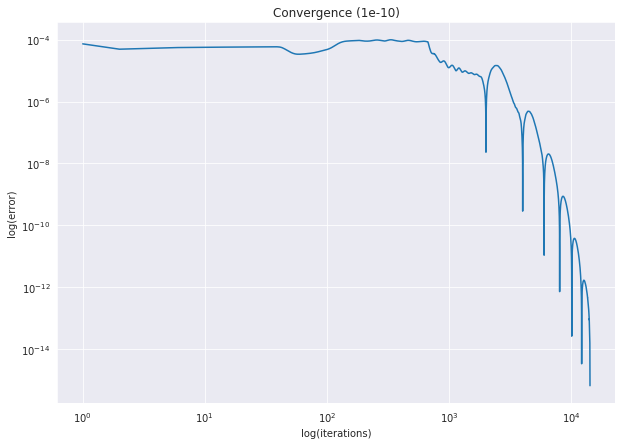

In [3]:
plt.figure(figsize=(10, 7))
sns.lineplot(range(1, len(errors)+1), errors)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("log(iterations)")
plt.ylabel("log(error)")
plt.title("Convergence (1e-10)")

plt.show()

In [4]:
L = 2.2
H = 0.41

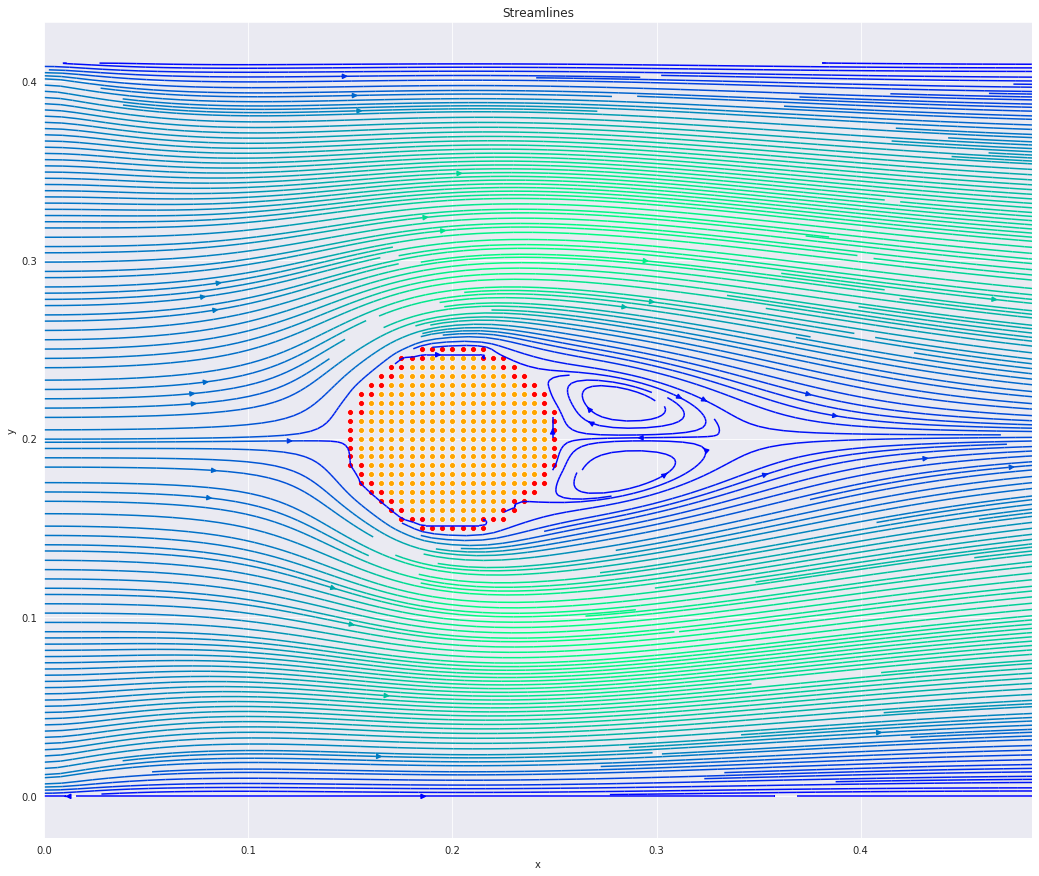

In [18]:
cutoff = 0.22
h = 15
ar = L/H

plt.figure(figsize=(h*ar*cutoff, h))
plt.streamplot(x, y, u.T, v.T, density=8, color=np.sqrt(u.T*u.T + v.T*v.T), cmap='winter')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Streamlines")

internal = np.loadtxt("./output/solid_points.txt")
dx = 1/200
xs = internal[:, 0]
ys = internal[:, 1]
sns.scatterplot(dx*np.array(xs), dx*np.array(ys), color='r')
internal = np.loadtxt("./output/internal_points.txt")
xi = internal[:, 0]
yi = internal[:, 1]
sns.scatterplot(dx*np.array(xi), dx*np.array(yi), color='orange')

plt.xlim([min(x), cutoff*max(x)])

plt.show()

In [16]:
u[(xs).astype(int), (ys).astype(int)]

array([ 0.00000e+00,  0.00000e+00, -3.18920e-17,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        3.56900e-17, -3.62835e-17,  0.00000e+00,  0.00000e+00,
       -3.66182e-17,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  3.86971e-17,  3.79579e-17,  0.00000e+00,
       -3.90658e-17,  2.02575e-02,  2.02352e-02,  0.00000e+00,
        2.27192e-17,  0.00000e+00,  0.00000e+00,  2.65295e-02,
        2.56005e-02,  1.25958e-02,  1.17021e-02,  7.48704e-03,
        6.58929e-03,  6.60923e-03,  5.67224e-03,  9.59378e-03,
        8.52565e-03,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        2.57084e-17, -1.21698e-02, -1.21386e-02,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
       -2.36531e-17,  0.00000e+00,  0.00000e+00,  0.00000e+00,
       -2.33582e-17, -2.33219e-17,  0.00000e+00,  0.000

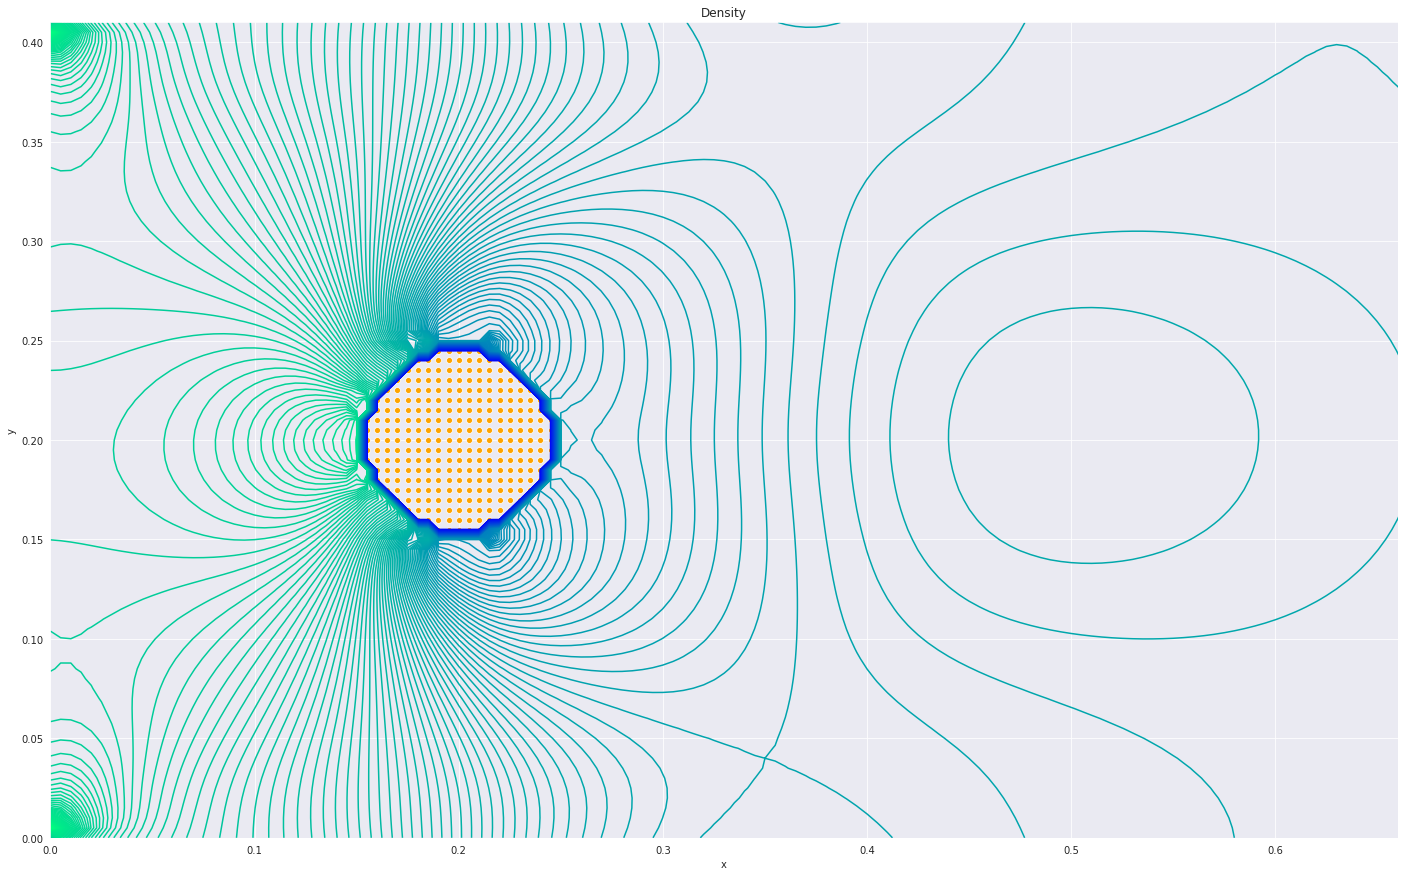

In [17]:
X, Y = np.meshgrid(x, y)

cutoff = 0.3

plt.figure(figsize=(h*ar*cutoff, h))
plt.contour(X.T, Y.T, rho, np.arange(np.min(rho), np.max(rho), 0.03), cmap="winter")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Density")

sns.scatterplot(dx*np.array(xi), dx*np.array(yi), color='orange')

plt.xlim([min(x), cutoff*max(x)])
plt.show()

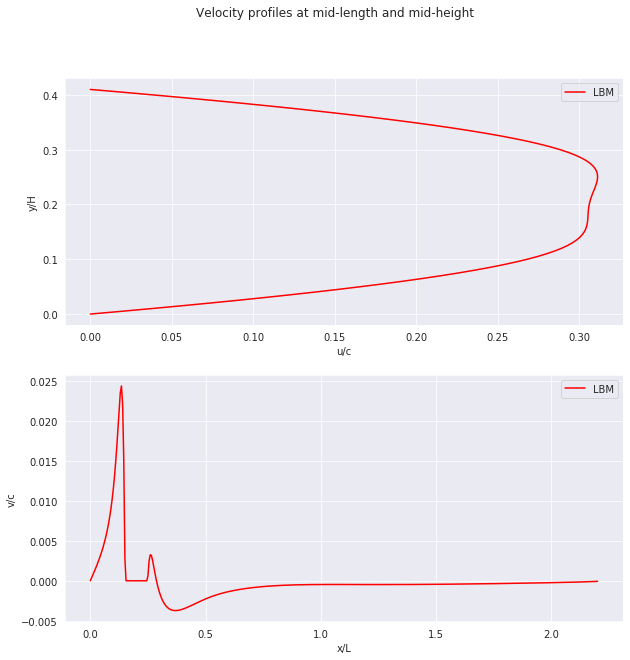

In [8]:
u_m = []
for j in range(ny):
    u_m.append(u[nx//2, j])
    
v_m = []
for i in range(nx):
    v_m.append(v[i, ny//2])

Ul = max(u_m)

plt.figure(figsize=(10, 10))
plt.suptitle("Velocity profiles at mid-length and mid-height")

plt.subplot(211)
plt.plot(u_m, y, color='r')
plt.xlabel("u/c")
plt.ylabel("y/H")
plt.legend(["LBM", "Benchmark (acenumerics)"])

plt.subplot(212)
plt.plot(x, v_m, color='r')
plt.xlabel("x/L")
plt.ylabel("v/c")
plt.legend(["LBM", "Benchmark (acenumerics)"])

plt.show()

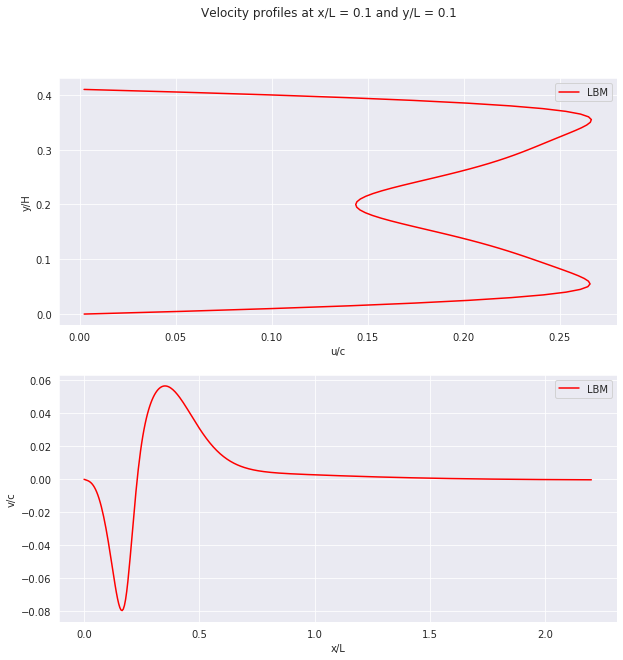

In [9]:
u_0 = []
for j in range(ny):
    u_0.append(u[20, j])
    
v_0 = []
for i in range(nx):
    v_0.append(v[i, 20])


plt.figure(figsize=(10, 10))
plt.suptitle("Velocity profiles at x/L = 0.1 and y/L = 0.1")

plt.subplot(211)
plt.plot(u_0, y, color='r')
plt.xlabel("u/c")
plt.ylabel("y/H")
plt.legend(["LBM", "Benchmark (acenumerics)"])

plt.subplot(212)
plt.plot(x, v_0, color='r')
plt.xlabel("x/L")
plt.ylabel("v/c")
plt.legend(["LBM", "Benchmark (acenumerics)"])

plt.show()

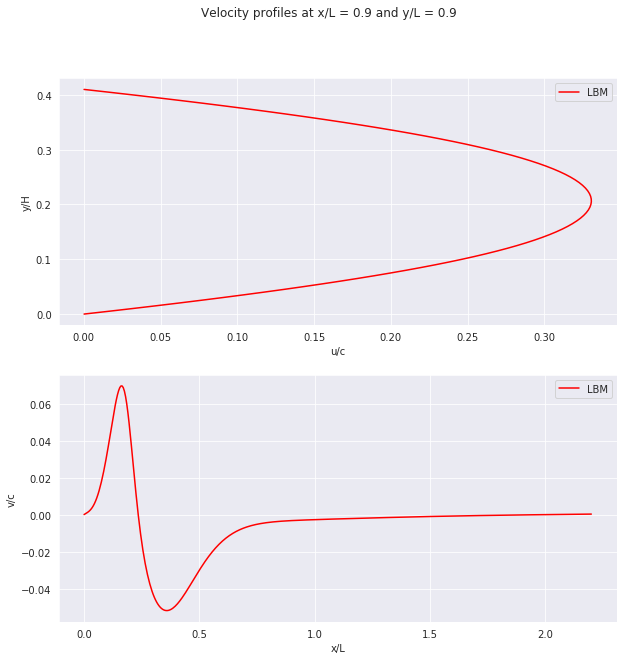

In [10]:
u_1 = []
for j in range(ny):
    u_1.append(u[-21, j])
    
v_1 = []
for i in range(nx):
    v_1.append(v[i, -21])


plt.figure(figsize=(10, 10))
plt.suptitle("Velocity profiles at x/L = 0.9 and y/L = 0.9")

plt.subplot(211)
plt.plot(u_1, y, color='r')
plt.xlabel("u/c")
plt.ylabel("y/H")
plt.legend(["LBM", "Benchmark (acenumerics)"])

plt.subplot(212)
plt.plot(x, v_1, color='r')
plt.xlabel("x/L")
plt.ylabel("v/c")
plt.legend(["LBM", "Benchmark (acenumerics)"])

plt.show()